WD: data/2021-11-17/SavingFields/
AlreadyDir
-----------
Initializing structure...
time for choose_chunkdivision = 7.9155e-05 s
Working in 2D dimensions.
Computational cell is 40 x 40 x 0 with resolution 2
     cylinder, center = (0,0,0)
          radius 62.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,0,0)
          radius 4.1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.08803,2.08803,2.08803)
time for set_epsilon = 0.0042851 s
-----------
Meep: using complex fields.
MPB solved for frequency_1(0,0,0.932258) = 0.646462 after 81 iters
MPB solved for frequency_1(0,0,0.930378) = 0.645161 after 24 iters
MPB solved for frequency_1(0,0,0.930378) = 0.645161 after 1 iters
Meep: using output directory 'data/2021-11-17/SavingFields/'


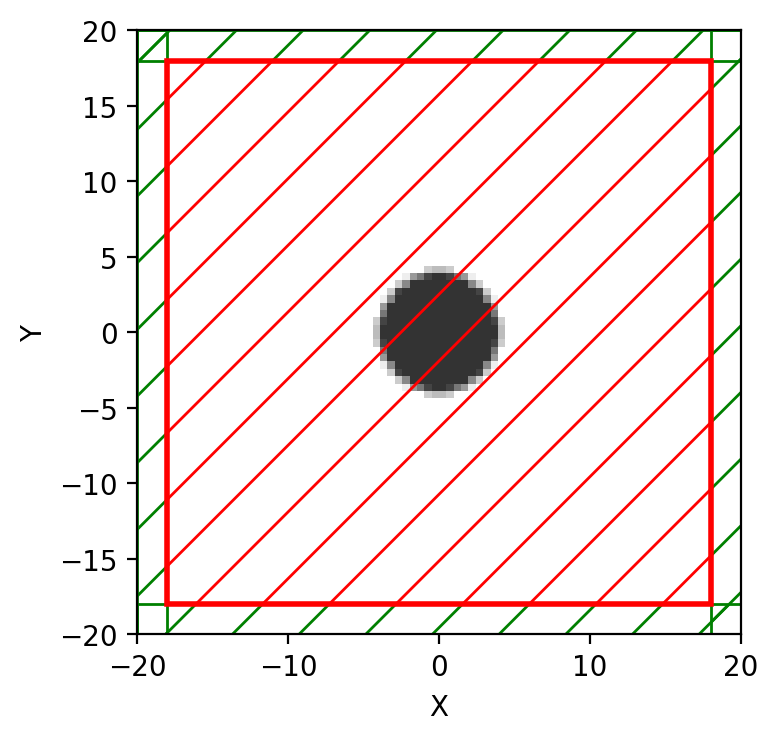

FloatProgress(value=0.0, description='0% done ', max=300.0)

harminv0:, frequency, imag. freq., Q, |amp|, amplitude, error
run 0 finished at t = 300.0 (1200 timesteps)


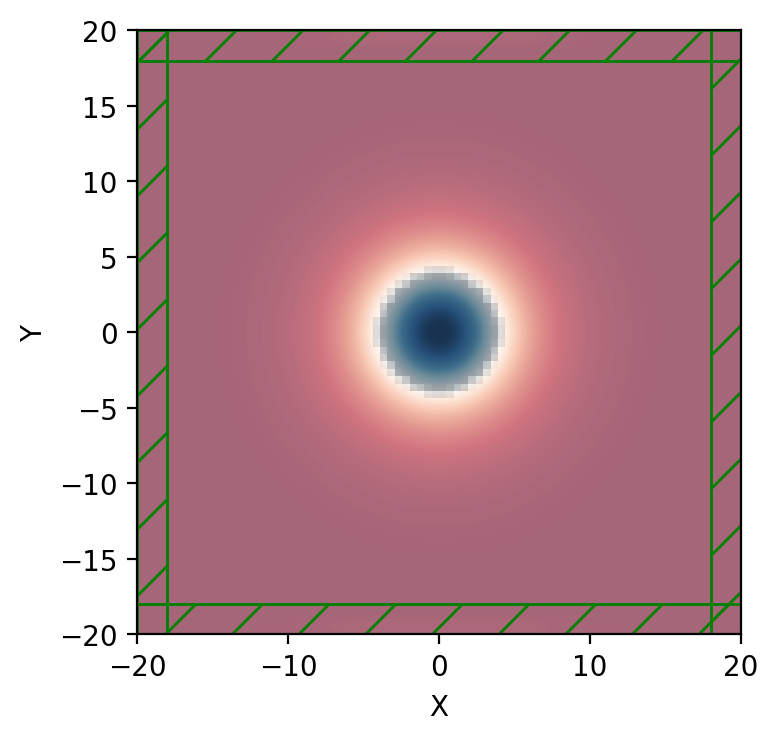

In [9]:
import Model as M
import time as time
import numpy as np

Model = M.Model()

Model.df     = 5e-2
Model.res = 2
Model.filename = 'SavingFields'
Model.Notes    = ''
Model.SimSize  = 40
#Model.R1 = 5


Model.Pad = 0       #Cladding left over from polishing


Model.buildFibre()
#Model.buildPolishedFibre(WPDMS=True)

Model.BuildModel(Plot=True) 

#Model.GetEigenModes() #also sets sources up at the fundamental mode

Model.SimT = 100  #setSimtime in fs
#Model.RunAndPlotF()

#Model.RunKpoints()
Model.RunHarmv()

In [10]:
vol = Model.sim.fields.total_volume()
ModeVol = Model.sim.fields.modal_volume_in_box(vol)


print(ModeVol)

40.444851457875316


# Custom Field Functions to calculate n_eff

In [8]:
def A(r,n,ey,hx):
    return (n**2*(np.cross(ey,hx)))

def B(r,n,ey):
    return (n**2 * ey.norm())